Consider the following images. Obtain the histograms for each of the images. Using a suitable distance measure (Bhattacharyya Distance) , find the distance between the query image and reference images. You can use the inbuilt function to calculate the Bhattacharyya Distance between two histograms, check classroom post for more information.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#For getting histogram from  images. 
from PIL import Image

In [39]:
def plot_histogram(image_file):
   
    # Load the image using PIL
    image = Image.open(image_file)

    # Convert the image to a numpy array
    image_array = np.array(image)

    # If the image is colored (RGB), compute histograms for each channel
    if len(image_array.shape) == 3:
        r_channel = image_array[:, :, 0]
        g_channel = image_array[:, :, 1]
        b_channel = image_array[:, :, 2]
        hist_r, _ = np.histogram(r_channel.flatten(), bins=32, range=[0, 256])
        hist_g, _ = np.histogram(g_channel.flatten(), bins=32, range=[0, 256])
        hist_b, _ = np.histogram(b_channel.flatten(), bins=32, range=[0, 256])
        # Adjust the bin size and plot the histograms for each channel
        plt.hist(r_channel.flatten(), bins=32, range=[0, 256], color='red', alpha=0.5, label='Red')
        plt.hist(g_channel.flatten(), bins=32, range=[0, 256], color='green', alpha=0.5, label='Green')
        plt.hist(b_channel.flatten(), bins=32, range=[0, 256], color='blue', alpha=0.5, label='Blue')

    else:
        plt.hist(image_array.flatten(), bins=64, range=[0, 256], color='gray', alpha=0.5, label='Grayscale')

    # Setting the y-axis to logarithmic scale.
    plt.yscale('log')

    
    plt.xlim([0, 150])

    plt.title('Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    return hist_r, hist_g, hist_b


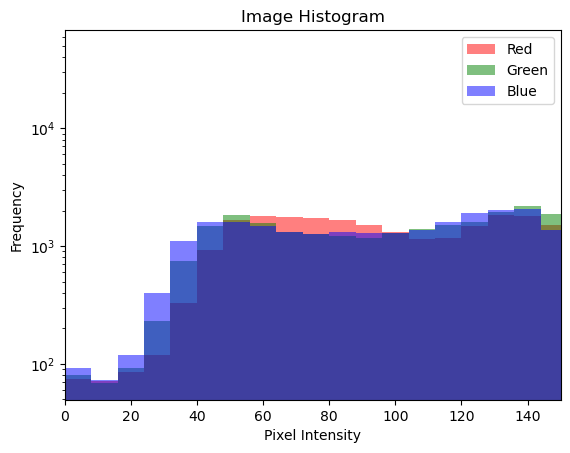

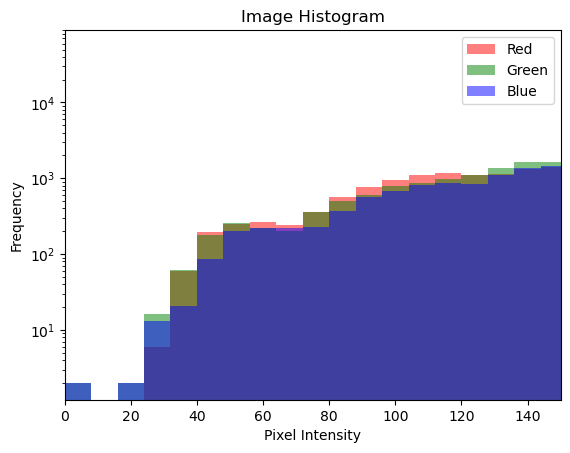

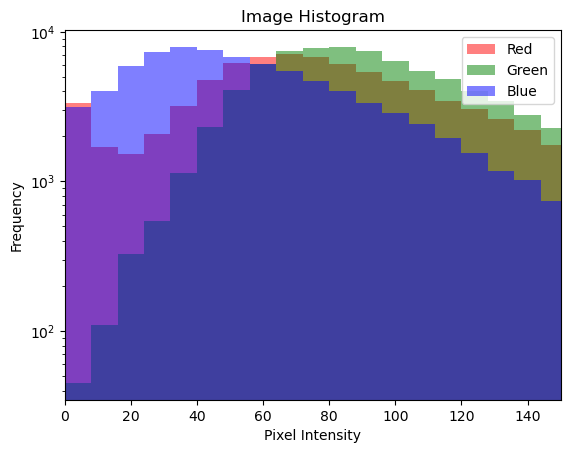

In [41]:
#plotting the histograms
q= plot_histogram('queryimage.png')
r1 = plot_histogram('refimage1.png')
r2= plot_histogram('refimage2.png')

In [38]:
def calculate_bhattacharyya_distance(hist1, hist2):
    
    # Normalizing the histograms to make them probability distributions
    hist1_n = hist1 / np.sum(hist1)
    hist2_n = hist2 / np.sum(hist2)

    # Calculating the Bhattacharyya coefficient
    bc = np.sum(np.sqrt(hist1_n * hist2_n))

    # Calculating the Bhattacharyya distance
    distance = -np.log(bc)
    
    return distance

In [45]:
print("Distance between histogram of image 1 and image2:", calculate_bhattacharyya_distance(q, r1))
print("Distance between histogram of image 1 and image3:", calculate_bhattacharyya_distance(q, r2))
print("Distance between histogram of image 2 and image3:", calculate_bhattacharyya_distance(r1, r2))

Distance between histogram of image 1 and image2: 0.03941742096140806
Distance between histogram of image 1 and image3: 0.5362109349385933
Distance between histogram of image 2 and image3: 0.8841999944462978
